In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("bigdatamart_Train.csv")
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
#importing test csv
df_test = pd.read_csv("bigdatamart_Test.csv")
df_test 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- we can see that there a quite few null values in the "Item_weight" and "Outlet_Size" columns
- since those are high numbers of null values, inputting mean in those columns could create a bias in the data set. 

In [5]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- Right out of the bat, the first columns that i think may play a huge role in predicting the sales could be:

        - Item_Visibility
        - Item_MRP
        - Item_Type
        - Outlet_Location_Type
        - Outlet_Type
        - Outlet_Size(if 2410 null values were filled)
        
 - But further analysis needs to be performed before dropping any columns

In [6]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
#Outlet Types based on above average number of sales.
#here we can see that supermarket type 1 has the most number of sales, followed by type 2 and type 3
df_train['Outlet_Type'][df_train['Item_Outlet_Sales']>2181].value_counts()

Supermarket Type1    2522
Supermarket Type3     669
Supermarket Type2     338
Name: Outlet_Type, dtype: int64

In [8]:
#looking at best outlet location based on above average sales
df_train['Outlet_Location_Type'][df_train['Item_Outlet_Sales']>2181].value_counts()

Tier 3    1432
Tier 2    1259
Tier 1     838
Name: Outlet_Location_Type, dtype: int64

In [9]:
# looking at the best sold item type based on above average sales
df_train['Item_Type'][df_train['Item_Outlet_Sales']>2181].value_counts()

Fruits and Vegetables    535
Snack Foods              531
Household                410
Frozen Foods             332
Canned                   281
Dairy                    266
Baking Goods             234
Health and Hygiene       205
Meat                     171
Soft Drinks              161
Breads                   108
Hard Drinks               90
Starchy Foods             69
Others                    64
Breakfast                 41
Seafood                   31
Name: Item_Type, dtype: int64

In [10]:
df_train['Item_MRP'][df_train['Item_Outlet_Sales']>2181].mean()

178.8366248228958

In [11]:
df_train['Item_Visibility'][df_train['Item_Outlet_Sales']>2181].mean()

0.059873628282233075

In [12]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [13]:
df_train.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

####  Visualizations

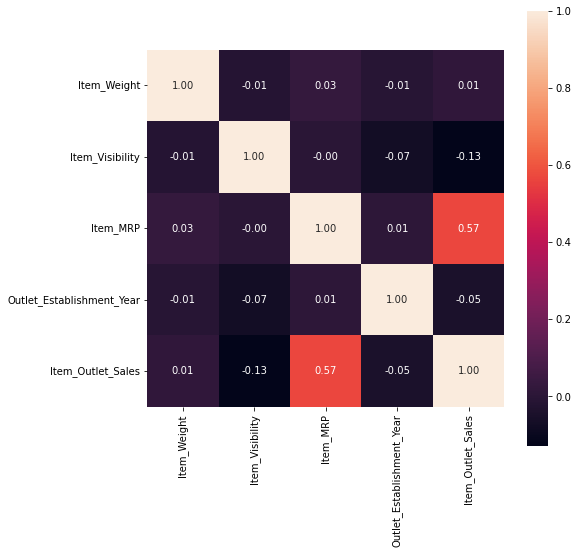

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(df_train.corr(),annot=True,fmt='.2f',square=True)
plt.show()

- Item_MRP has the highest correlation with the sales

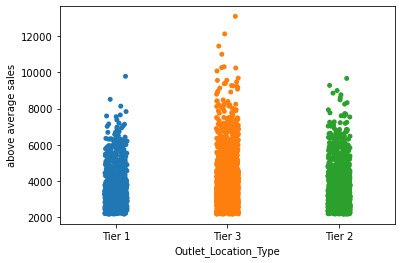

In [15]:
df_sales = pd.DataFrame() #creating a dataframe to host the above average sales values
df_sales['above average sales'] = df_train['Item_Outlet_Sales'][df_train['Item_Outlet_Sales']>2181] 
sns.stripplot(x=df_train['Outlet_Location_Type'],y=df_sales['above average sales'])
plt.show()

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

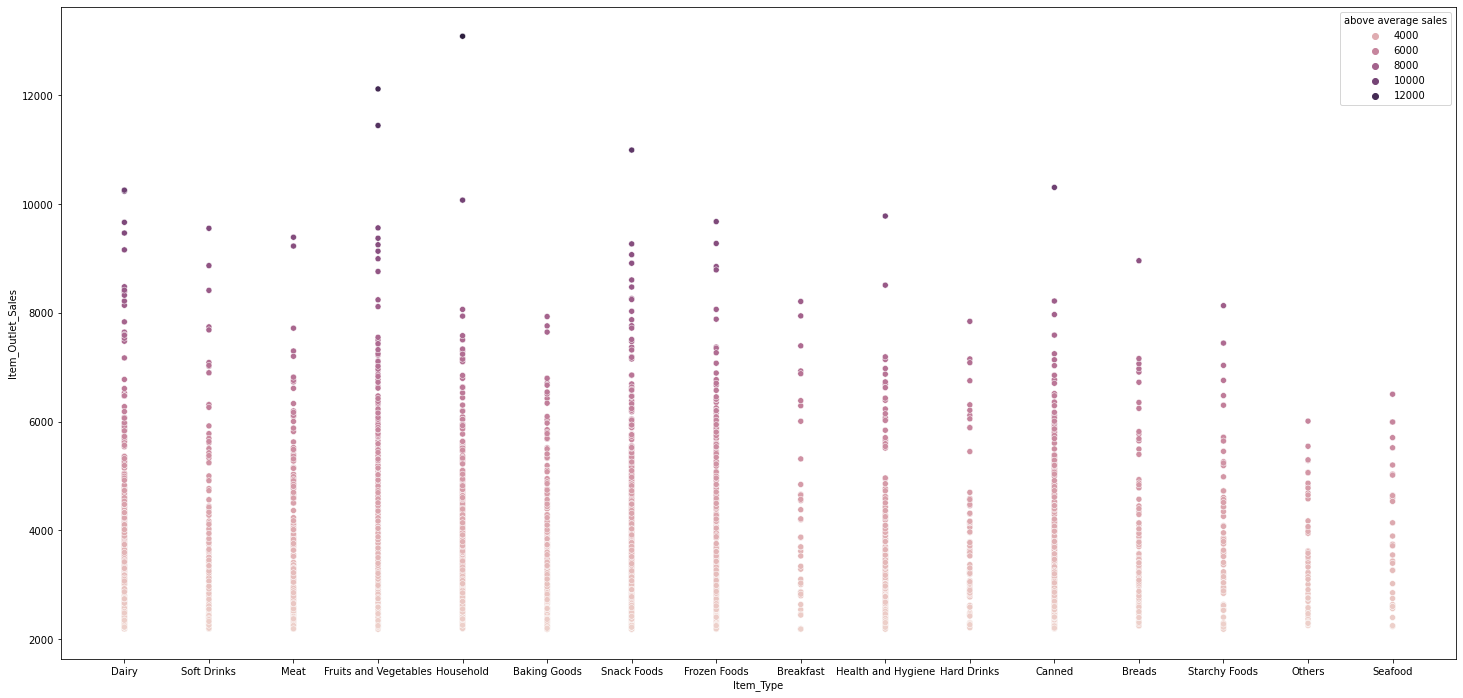

In [16]:
plt.figure(figsize=(25,12))
sns.scatterplot(x=df_train['Item_Type'],y=df_train['Item_Outlet_Sales'],hue=df_sales['above average sales'])

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

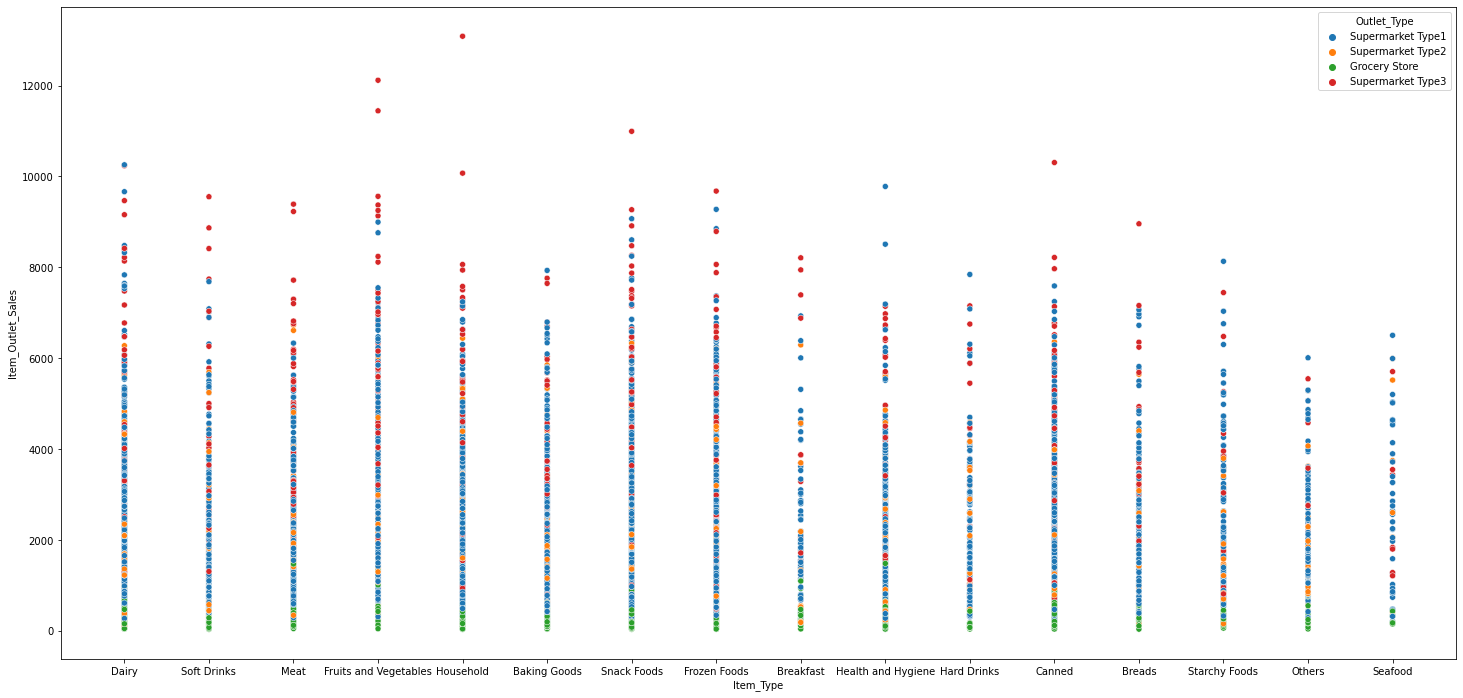

In [17]:
plt.figure(figsize=(25,12))
sns.scatterplot(x=df_train['Item_Type'],y=df_train['Item_Outlet_Sales'],hue=df_train['Outlet_Type'])

##### from the above plot we can see that:
    • most of the low value sales(0-500) were done at the Grocery Stores.
    • majority of the sales in between(500-5000) were done at Supermarket Type1.
    • majority of the high value sales (5000+) were done at Supermarket Type3.

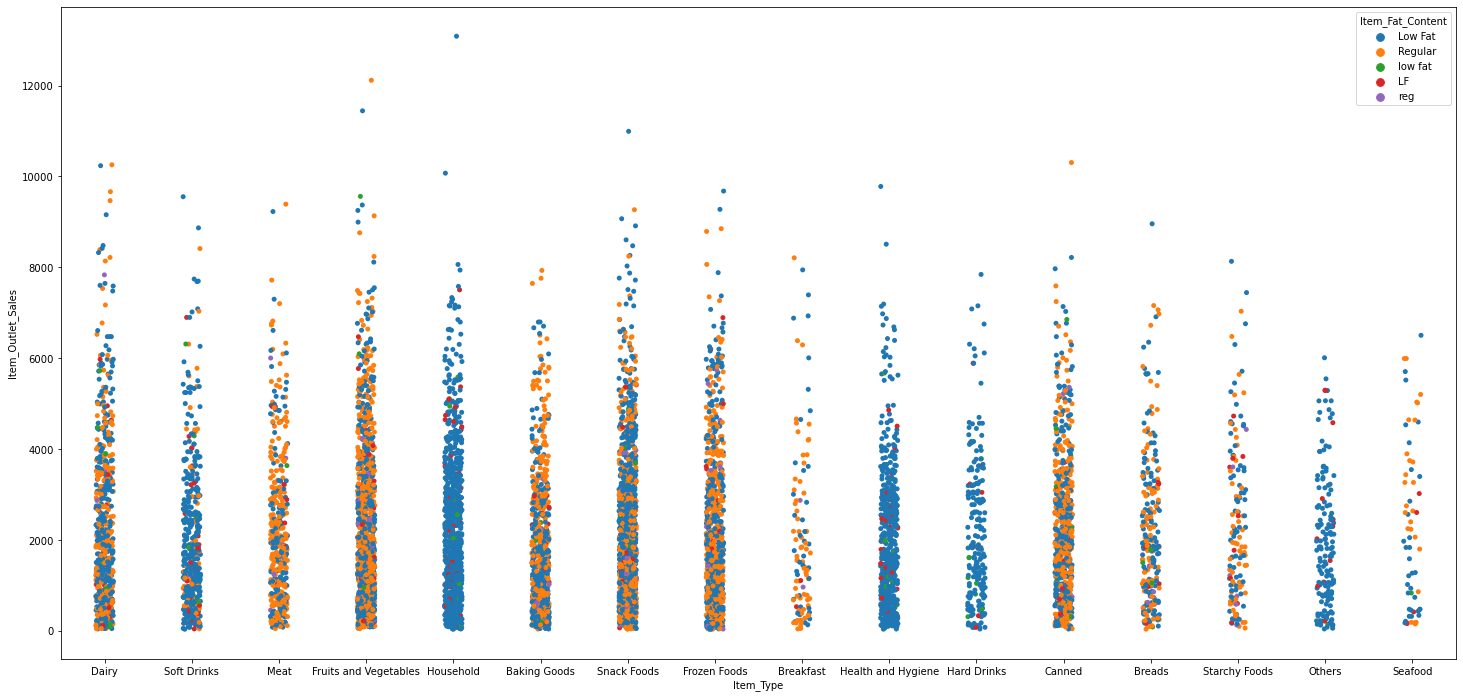

In [18]:
plt.figure(figsize=(25,12))
sns.stripplot(x=df_train['Item_Type'],y=df_train['Item_Outlet_Sales'],hue=df_train['Item_Fat_Content'])
plt.show()

- Low Fat column can be dropped, since it has various "low fat" tags and it doesn't really contribute to the prediction of sales

        - "LF","low fat","Low Fat"

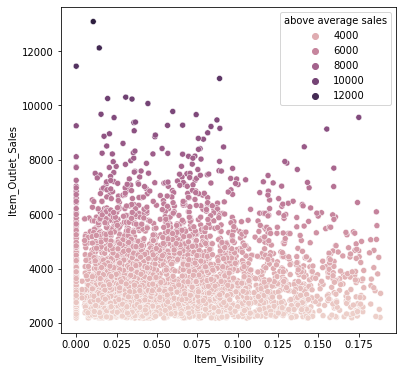

In [19]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=df_train['Item_Visibility'],y=df_train['Item_Outlet_Sales'],hue=df_sales['above average sales'])
plt.show()

- high item visibility does not equal to high sales

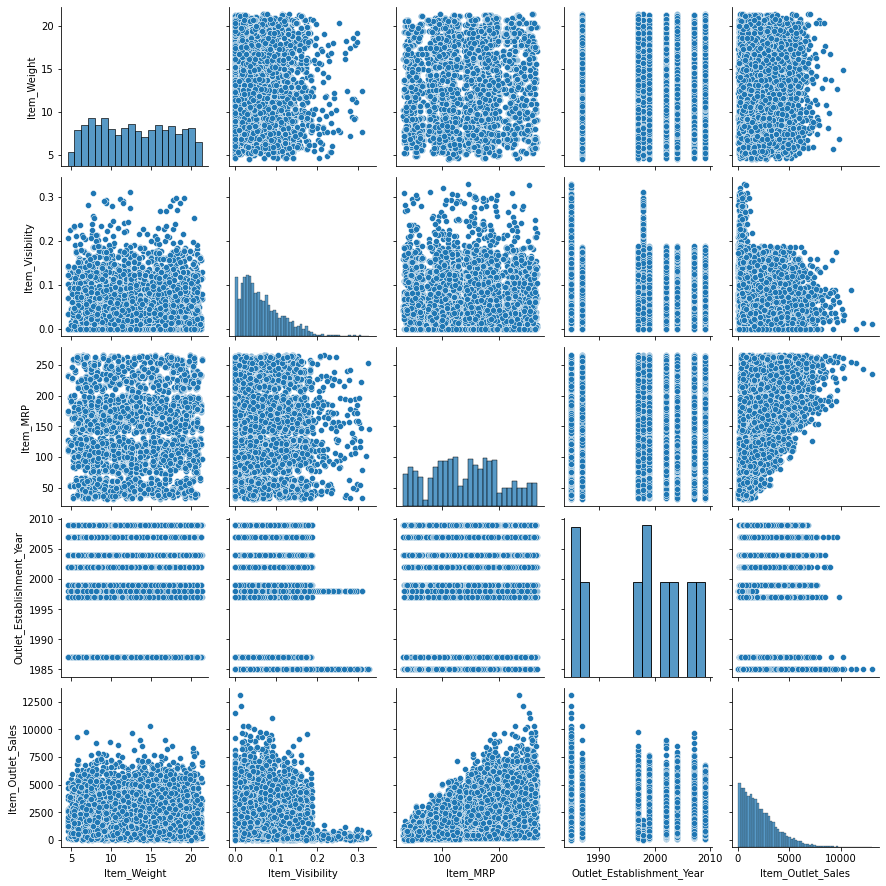

In [20]:
sns.pairplot(df_train,)
plt.show()

#### Dropping columns 

In [21]:
df_train.drop(['Outlet_Size','Item_Weight','Item_Fat_Content'],axis=1,inplace=True)

#### Label Encoder on Nominal columns 

In [22]:
from sklearn.preprocessing import StandardScaler,power_transform,LabelEncoder

In [23]:
#converting the object datatype columns using label encoder
LE = LabelEncoder()

collist = df_train.columns.values
for r in range(0,len(collist)):
    for i in collist:
        if (df_train[i].dtype=='object'):
            df_train[i] = LE.fit_transform(df_train[i])
        elif (df_train[i].dtype=='float64') or (df_train[i].dtype=='int64'):
            r+1
        else:
            break
            
df_train.head()

,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,0.016047,4,249.8092,9,1999,0,1,3735.1380
1,8,0.019278,14,48.2692,3,2009,2,2,443.4228
2,662,0.016760,10,141.6180,9,1999,0,1,2097.2700
3,1121,0.000000,6,182.0950,0,1998,2,0,732.3800
4,1297,0.000000,9,53.8614,1,1987,2,1,994.7052


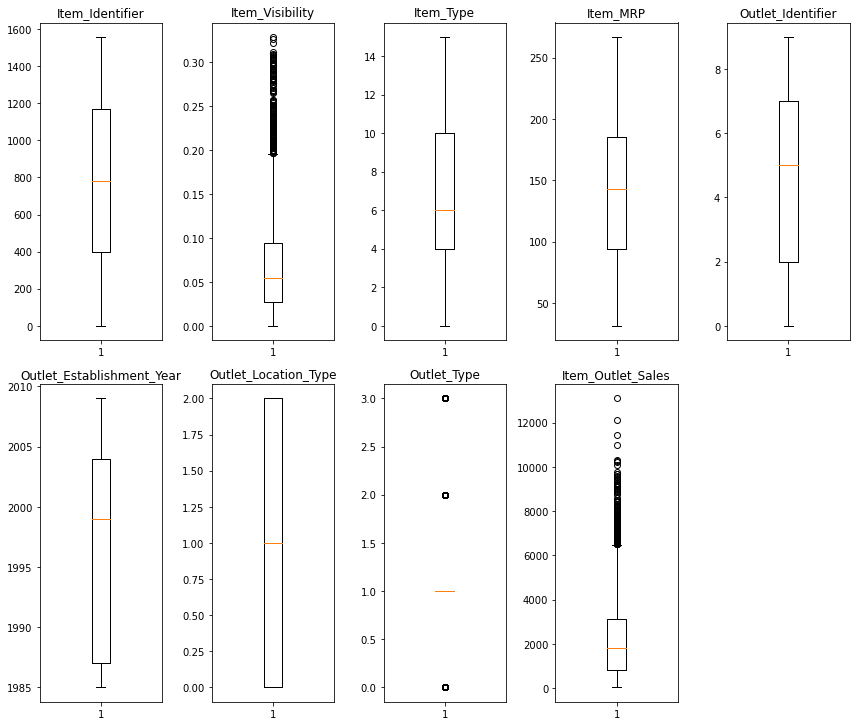

In [24]:
# outliers

collist = df_train.columns.values
ncols = 5
nrows = 4

plt.figure(figsize=(12,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    plt.boxplot(df_train[collist[i]])
    plt.title(df_train.columns[i])
    plt.tight_layout()

- item_visibility has alot of outliers

In [25]:
# dropping item visibility
df_train.drop('Item_Visibility',axis=1,inplace=True)

#### Multicollinearity

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Variables'] = df_train.columns
vif['VIF Factor'] = [variance_inflation_factor(df_train.values,i) for i in range(df_train.shape[1])]
vif

,Variables,VIF Factor
0,Item_Identifier,4.014602
1,Item_Type,3.952749
2,Item_MRP,10.085095
3,Outlet_Identifier,15.490370
4,Outlet_Establishment_Year,34.720675
5,Outlet_Location_Type,14.874043
6,Outlet_Type,9.417695
7,Item_Outlet_Sales,5.259154


#### Seperating values into X & Y

In [26]:
x = df_train.drop('Item_Outlet_Sales',axis=1)
y = df_train['Item_Outlet_Sales']

In [27]:
df_train.columns.values

array(['Item_Identifier', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'], dtype=object)

#### Removing skewness using Power Transform

In [29]:
x = power_transform(x,method='yeo-johnson') 
x_df = pd.DataFrame(x) #turning the array to a dataframe
x_skew = pd.DataFrame({"After":x_df.skew()})
x_skew.set_index(df_train.columns.values[0:7])

,After
Item_Identifier,-0.293700
Item_Type,-0.164574
Item_MRP,-0.115386
Outlet_Identifier,-0.213935
Outlet_Establishment_Year,-0.200959
Outlet_Location_Type,-0.220632
Outlet_Type,0.007863


- skewness has reduced

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Variables'] = df_train.columns.values[0:7]
vif['VIF Factor After'] = [variance_inflation_factor(x_df.values,i) for i in range(x_df.shape[1])]
vif

,Variables,VIF Factor After
0,Item_Identifier,1.001703
1,Item_Type,1.002692
2,Item_MRP,1.001878
3,Outlet_Identifier,4.579911
4,Outlet_Establishment_Year,1.005717
5,Outlet_Location_Type,5.290137
6,Outlet_Type,2.761201


- VIF also reduced after power transform

#### train_test_split

In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#### Model Selection

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [32]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_r2 = r2_score(y_test,lr_pred)
lr_mae = mean_absolute_error(y_test,lr_pred)
lr_mse = mean_squared_error(y_test,lr_pred)
lr_rmse = mean_squared_error(y_test,lr_pred,squared=False)

print ("Model Name:",lr)
print ("R2 Score:",round(lr_r2*100,2))
print ("MSE:",lr_mse)
print ("MAE:",lr_mae)
print ("RMSE:",lr_rmse)

Model Name: LinearRegression()
R2 Score: 50.28
MSE: 1487149.680894724
MAE: 905.1185779910556
RMSE: 1219.487466477095


In [33]:
L = Lasso()
L.fit(x_train,y_train)
L_pred = L.predict(x_test)
L_r2 = r2_score(y_test,L_pred)
L_mae = mean_absolute_error(y_test,L_pred)
L_mse = mean_squared_error(y_test,L_pred)
L_rmse = mean_squared_error(y_test,L_pred,squared=False)

print ("Model Name:",L)
print ("R2 Score:",round(L_r2*100,2))
print ("Mean Squared Error:",L_mse)
print ("Mean Absolute Error:",L_mae)
print ("Root Mean Squared Error:",L_rmse)

Model Name: Lasso()
R2 Score: 50.27
Mean Squared Error: 1487321.3751309868
Mean Absolute Error: 905.046164744547
Root Mean Squared Error: 1219.557860509696


In [34]:
R = Ridge()
R.fit(x_train,y_train)
R_pred = R.predict(x_test)
R_r2 = r2_score(y_test,R_pred)
R_mae = mean_absolute_error(y_test,R_pred)
R_mse = mean_squared_error(y_test,R_pred)
R_rmse = mean_squared_error(y_test,R_pred,squared=False)

print ("Model Name:",R)
print ("R2 Score:",round(R_r2*100,2))
print ("Mean Squared Error:",R_mse)
print ("Mean Absolute Error:",R_mae)
print ("Root Mean Squared Error:",R_rmse)

Model Name: Ridge()
R2 Score: 50.28
Mean Squared Error: 1487176.8194747597
Mean Absolute Error: 905.1092433323696
Root Mean Squared Error: 1219.4985934697752


In [35]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
svr_para = {'kernel':['linear','rbf','poly','sigmoid'],'C':range(1,10)}
gs_svr = GridSearchCV(svr,svr_para,cv=2,scoring='accuracy')
gs_svr.fit(x_train,y_train)
gs_svr.best_params_

{'C': 1, 'kernel': 'linear'}

In [36]:
svr = SVR(C=1,kernel='linear')
svr.fit(x_train,y_train)
svr_pred = svr.predict(x_test)
svr_r2 = r2_score(y_test,svr_pred)
svr_mae = mean_absolute_error(y_test,svr_pred)
svr_mse = mean_squared_error(y_test,svr_pred)
svr_rmse = mean_squared_error(y_test,svr_pred,squared=False)

print ("Model Name: SVR")
print ("R2 Score:",round(svr_r2*100,2))
print ("Mean Squared Error:",svr_mse)
print ("Mean Absolute Error:",svr_mae)
print ("Root Mean Squared Error:",svr_rmse)

Model Name: SVR
R2 Score: 45.14
Mean Squared Error: 1640915.2793340434
Mean Absolute Error: 905.1732779946151
Root Mean Squared Error: 1280.982154182502


In [37]:
from sklearn.ensemble import BaggingRegressor

br = BaggingRegressor()
br_para = {'n_estimators':np.arange(100,500,50)}
gs_br = GridSearchCV(br,br_para,cv=7,scoring='accuracy')
gs_br.fit(x_train,y_train)
gs_br.best_params_

{'n_estimators': 100}

In [38]:
br = BaggingRegressor(n_estimators=100)
br.fit(x_train,y_train)
br_pred = br.predict(x_test)
br_r2 = r2_score(y_test,br_pred)
br_mae = mean_absolute_error(y_test,br_pred)
br_mse = mean_squared_error(y_test,br_pred)
br_rmse = mean_squared_error(y_test,br_pred,squared=False)

print ("Model Name: BaggingRegressor")
print ("r2 Score:",round(br_r2*100,2),'%')
print ("Mean Absolute Error:",br_mae)
print ("Mean Squared Error:",br_mse)
print ("Root Mean Squared Error:",br_rmse)

Model Name: BaggingRegressor
r2 Score: 53.75 %
Mean Absolute Error: 817.5011984
Mean Squared Error: 1383314.945133977
Root Mean Squared Error: 1176.144100497034


In [39]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr_para = {'loss':['huber','quantile'],'n_estimators':range(50,250,50),
            'criterion':['friedman_mse','mse','squared_error']}
gs_gbr = GridSearchCV(gbr,gbr_para,cv=3,scoring='accuracy')
gs_gbr.fit(x_train,y_train)
gs_gbr.best_params_

{'criterion': 'friedman_mse', 'loss': 'huber', 'n_estimators': 50}

In [40]:
gbr = GradientBoostingRegressor(n_estimators=50,loss='huber',criterion='friedman_mse')
gbr.fit(x_train,y_train)
gbr_pred = gbr.predict(x_test)
gbr_r2 = r2_score(y_test,gbr_pred)
gbr_mae = mean_absolute_error(y_test,gbr_pred)
gbr_mse = mean_squared_error(y_test,gbr_pred)
gbr_rmse = mean_squared_error(y_test,gbr_pred,squared=False)

print ("r2 Score:",round(gbr_r2*100,2),'%')
print ("Mean Absolute Error:",gbr_mae)
print ("Mean Squared Error:",gbr_mse)
print ("Root Mean Squared Error:",gbr_rmse)

r2 Score: 58.77 %
Mean Absolute Error: 772.8310100895017
Mean Squared Error: 1233096.322305971
Root Mean Squared Error: 1110.4487031402987


In [41]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr_para = {'algorithm':['auto','ball_tree','kd_tree','brute'],'n_neighbors':range(1,51),
            'weights':['uniform','distance']}
gs_knr = GridSearchCV(knr,knr_para,cv=3,scoring='accuracy')
gs_knr.fit(x_train,y_train)
gs_knr.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [42]:
knr = KNeighborsRegressor(n_neighbors=1,algorithm='auto',weights='uniform')
knr.fit(x_train,y_train)
knr_pred = knr.predict(x_test)
knr_r2 = r2_score(y_test,knr_pred)
knr_mae = mean_absolute_error(y_test,knr_pred)
knr_mse = mean_squared_error(y_test,knr_pred)
knr_rmse = mean_squared_error(y_test,knr_pred,squared=False)

print ("r2 Score:",round(knr_r2*100,2),'%')
print ("Mean Absolute Error:",knr_mae)
print ("Mean Squared Error:",knr_mse)
print ("Root Mean Squared Error:",knr_rmse)

r2 Score: 24.51 %
Mean Absolute Error: 1055.6104753079178
Mean Squared Error: 2258068.1635513026
Root Mean Squared Error: 1502.6869812277282


In [43]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada_para = {'loss':['linear','square','exponential'],'random_state':range(1,50)}
gs_ada = GridSearchCV(ada,ada_para,cv=3,scoring='accuracy')
gs_ada.fit(x_train,y_train)
gs_ada.best_params_

{'loss': 'linear', 'random_state': 1}

In [44]:
ada = AdaBoostRegressor(random_state=1,loss='linear')
ada.fit(x_train,y_train)
ada_pred = ada.predict(x_test)
ada_r2 = r2_score(y_test,ada_pred)
ada_mae = mean_absolute_error(y_test,ada_pred)
ada_mse = mean_squared_error(y_test,ada_pred)
ada_rmse = mean_squared_error(y_test,ada_pred,squared=False)

print ("r2 Score:",round(ada_r2*100,2),'%')
print ("Mean Absolute Error:",ada_mae)
print ("Mean Squared Error:",ada_mse)
print ("Root Mean Squared Error:",ada_rmse)

r2 Score: 47.68 %
Mean Absolute Error: 989.985102215273
Mean Squared Error: 1564947.3293967205
Root Mean Squared Error: 1250.978548735637


In [45]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr_para = {'max_features':['sqrt','log2'],'random_state':range(1,101)}
gs_rfr = GridSearchCV(rfr,rfr_para,cv=3,scoring='accuracy')
gs_rfr.fit(x_train,y_train)
gs_rfr.best_params_

{'max_features': 'sqrt', 'random_state': 1}

In [46]:
rfr = RandomForestRegressor(random_state=1,max_features='sqrt')
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)
rfr_r2 = r2_score(y_test,rfr_pred)
rfr_mae = mean_absolute_error(y_test,rfr_pred)
rfr_mse = mean_squared_error(y_test,rfr_pred)
rfr_rmse = mean_squared_error(y_test,rfr_pred,squared=False)

print ("r2 Score:",round(rfr_r2*100,2),'%')
print ("Mean Absolute Error:",rfr_mae)
print ("Mean Squared Error:",rfr_mse)
print ("Root Mean Squared Error:",rfr_rmse)

r2 Score: 53.91 %
Mean Absolute Error: 812.8511731002933
Mean Squared Error: 1378622.02457475
Root Mean Squared Error: 1174.1473606727352


#### Comparing the models

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
R2 ,MSE ,MAE ,RMSE ,CV ,accuracy ,model_name = [],[],[],[],[],[],[]

models = {'RandomForestRegression':rfr,'SupportVectorRegression':svr, 
          'ADABoostRegression':ada,'KNeighborsRegression':knr,
          'GradientBoostingRegression':gbr,'LinearRegression':lr,
          'Lasso':L,'Ridge':R}

for i in models.keys():
    model = models[i]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    test_score = model.score(x_test,y_test)
    cv_score = cross_val_score(models[i],x,y).mean()
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = mean_squared_error(y_test,y_pred,squared=False)
    R2_S = r2_score(y_test,y_pred)
    print('-'*50)
    print("Model:",i)
    model_name.append(i)
    print("Accuracy:",round(test_score*100,2))
    accuracy.append(round(test_score*100,2))
    print("R2 Score:",round(R2_S*100,2))
    R2.append(round(R2_S*100,2))
    print("CV Score:",round(cv_score*100,2))
    CV.append(round(cv_score*100,2))
    print("MAE:",mae)
    MAE.append(mae)
    print("MSE:",mse)
    MSE.append(mse)
    print("RMSE:",rmse)
    RMSE.append(rmse)

--------------------------------------------------
Model: RandomForestRegression
Accuracy: 53.91
R2 Score: 53.91
CV Score: 54.36
MAE: 812.8511731002933
MSE: 1378622.02457475
RMSE: 1174.1473606727352
--------------------------------------------------
Model: SupportVectorRegression
Accuracy: 45.14
R2 Score: 45.14
CV Score: 47.19
MAE: 905.1732779946151
MSE: 1640915.2793340434
RMSE: 1280.982154182502
--------------------------------------------------
Model: ADABoostRegression
Accuracy: 47.68
R2 Score: 47.68
CV Score: 51.27
MAE: 989.985102215273
MSE: 1564947.3293967205
RMSE: 1250.978548735637
--------------------------------------------------
Model: KNeighborsRegression
Accuracy: 24.51
R2 Score: 24.51
CV Score: 21.12
MAE: 1055.6104753079178
MSE: 2258068.1635513026
RMSE: 1502.6869812277282
--------------------------------------------------
Model: GradientBoostingRegression
Accuracy: 58.77
R2 Score: 58.77
CV Score: 59.51
MAE: 772.8310287339124
MSE: 1233096.2671532338
RMSE: 1110.4486783067616


In [49]:
bigmart_sales_df = pd.DataFrame({'Model':model_name,'Accuracy':accuracy,'CV Score':CV,'R2 Score':R2,'MSE':MSE,
                        'RMSE':RMSE,'MAE':MAE})
bigmart_sales_df.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy,CV Score,R2 Score,MSE,RMSE,MAE
4,GradientBoostingRegression,58.77,59.51,58.77,1.233096e+06,1110.448678,772.831029
0,RandomForestRegression,53.91,54.36,53.91,1.378622e+06,1174.147361,812.851173
5,LinearRegression,50.28,51.82,50.28,1.487150e+06,1219.487466,905.118578
7,Ridge,50.28,51.82,50.28,1.487177e+06,1219.498593,905.109243
6,Lasso,50.27,51.82,50.27,1.487321e+06,1219.557861,905.046165
2,ADABoostRegression,47.68,51.27,47.68,1.564947e+06,1250.978549,989.985102
1,SupportVectorRegression,45.14,47.19,45.14,1.640915e+06,1280.982154,905.173278
3,KNeighborsRegression,24.51,21.12,24.51,2.258068e+06,1502.686981,1055.610475


- The best model is the GradientBoostingRegression model (58.77%)
- GradientBoostingRegression model will be used to predict the sales in the test dataset.

#### Applying GradientBoostingRegressor on the Test Dataset

In [57]:
df_test.columns.values
# some columns will have to be dropped

array(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'], dtype=object)

In [58]:
df_test.drop(['Outlet_Size','Item_Weight','Item_Visibility','Item_Fat_Content'],axis=1,inplace=True)

In [60]:
# applying LabelEncoder on the test dataset

collist = df_test.columns.values
for r in range(0,len(collist)):
    for i in collist:
        if (df_test[i].dtype=='object'):
            df_test[i] = LE.fit_transform(df_test[i])
        elif (df_test[i].dtype=='float64') or (df_test[i].dtype=='int64'):
            r+1
        else:
            break

In [66]:
# GradientBoostingRegression()

gbr = GradientBoostingRegressor(n_estimators=50,loss='huber',criterion='friedman_mse')
gbr.fit(x_train,y_train)
gbr_pred = gbr.predict(df_test)

In [79]:
df_test['Predicted Sales'] = gbr_pred
df_test.head()

,Item_Identifier,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Predicted Sales
0,1103,13,107.8622,9,1999,0,1,3386.782014
1,1067,4,87.3198,2,2007,1,1,3386.782014
2,1406,11,241.7538,0,1998,2,0,3359.441967
3,809,13,155.0340,2,2007,1,1,3386.782014
4,1184,4,234.2300,5,1985,2,3,3590.161399


#### Saving the file

In [82]:
import pickle

In [83]:
# saving the training models dataframe
file = 'BigMart_Sales_Train_Prediction'
pickle.dump(bigmart_sales_df,open(file,'wb'))

In [84]:
# saving the predicted sales data
file_test = "BigMart_Sales_Predicted_Test_Data"
pickle.dump(df_test,open(file_test,'wb'))